In [16]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from random import randint
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv('dataset/Stock Headlines.csv', encoding = 'ISO-8859-1')
df.dropna(inplace=True)
print(df.shape)
df.head(2)

(4098, 27)


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite


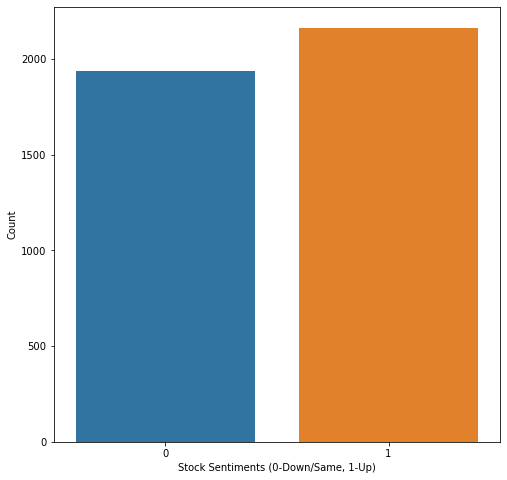

In [5]:
plt.figure(figsize=(8,8))
sns.countplot(x='Label', data=df)
plt.xlabel('Stock Sentiments (0-Down/Same, 1-Up)')
plt.ylabel('Count')
plt.show()

In [6]:
df_copy = df.copy()
df_copy.reset_index(inplace=True)
train = df_copy[df_copy['Date'] < '20150101']
test = df_copy[df_copy['Date'] > '20141231']
y_train = train['Label']
train = train.iloc[:, 3:28]
y_test = test['Label']
test = test.iloc[:, 3:28]

In [7]:
train.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)
test.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)

In [8]:
new_columns = [str(i) for i in range(0,25)]
train.columns = new_columns
test.columns = new_columns
for i in new_columns:
  train[i] = train[i].str.lower()
  test[i] = test[i].str.lower()

In [9]:
train_headlines = []
test_headlines = []
for row in range(0, train.shape[0]):
  train_headlines.append(' '.join(str(x) for x in train.iloc[row, 0:25]))
for row in range(0, test.shape[0]):
  test_headlines.append(' '.join(str(x) for x in test.iloc[row, 0:25]))

In [10]:
ps = PorterStemmer()
train_corpus = []
for i in range(0, len(train_headlines)):
  words = train_headlines[i].split()
  words = [word for word in words if word not in set(stopwords.words('english'))]
  words = [ps.stem(word) for word in words]
  headline = ' '.join(words)
  train_corpus.append(headline)

In [11]:
test_corpus = []
for i in range(0, len(test_headlines)):
  words = test_headlines[i].split()
  words = [word for word in words if word not in set(stopwords.words('english'))]
  words = [ps.stem(word) for word in words]
  headline = ' '.join(words)
  test_corpus.append(headline)

In [12]:
down_words = []
for i in list(y_train[y_train==0].index):
  down_words.append(train_corpus[i])
up_words = []
for i in list(y_train[y_train==1].index):
  up_words.append(train_corpus[i])

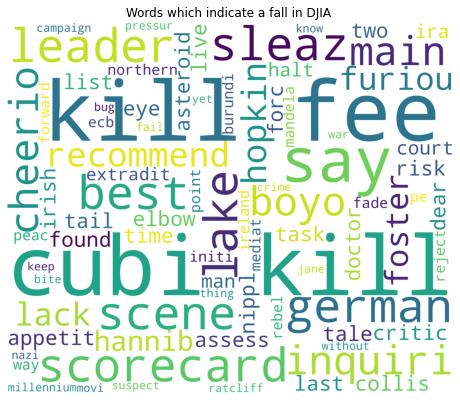

In [13]:
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(down_words[1])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate a fall in DJIA ")
plt.show()

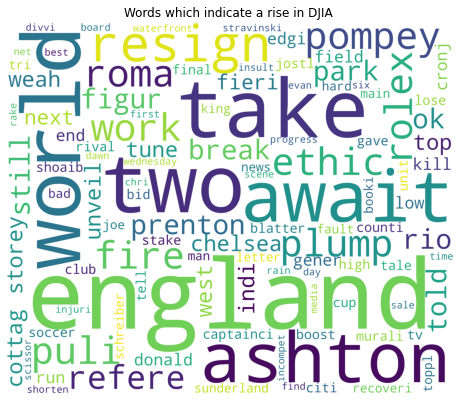

In [14]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(up_words[5])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate a rise in DJIA ")
plt.show()

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(2,2))
X_train = cv.fit_transform(train_corpus).toarray()
X_test = cv.transform(test_corpus).toarray()

In [17]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
lr_y_pred = lr_classifier.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

Accuracy score is: 85.98%
Precision score is: 0.87
Recall score is: 0.85


In [19]:
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)
lr_cm

array([[162,  24],
       [ 29, 163]], dtype=int64)

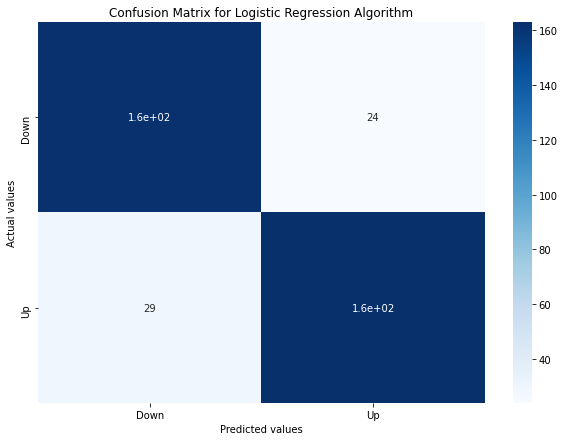

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(data=lr_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

In [22]:
score1 = accuracy_score(y_test, rf_y_pred)
score2 = precision_score(y_test, rf_y_pred)
score3 = recall_score(y_test, rf_y_pred)
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

Accuracy score is: 86.77%
Precision score is: 0.85
Recall score is: 0.9


In [23]:
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_cm

array([[156,  30],
       [ 20, 172]], dtype=int64)

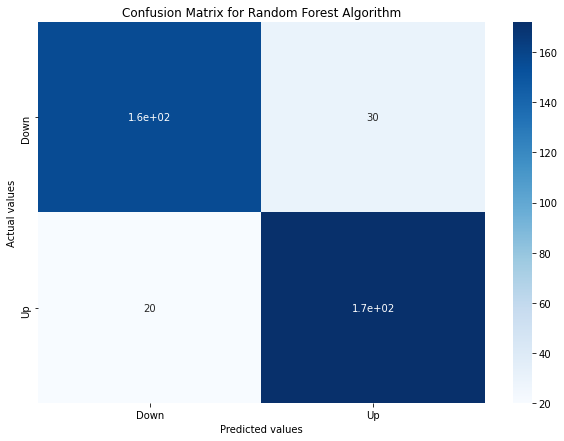

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(data=rf_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Random Forest Algorithm')
plt.show()

In [25]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_y_pred = nb_classifier.predict(X_test)

In [26]:
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

Accuracy score is: 83.86%
Precision score is: 0.85
Recall score is: 0.83


In [27]:
nb_cm = confusion_matrix(y_test, nb_y_pred)
nb_cm

array([[158,  28],
       [ 33, 159]], dtype=int64)

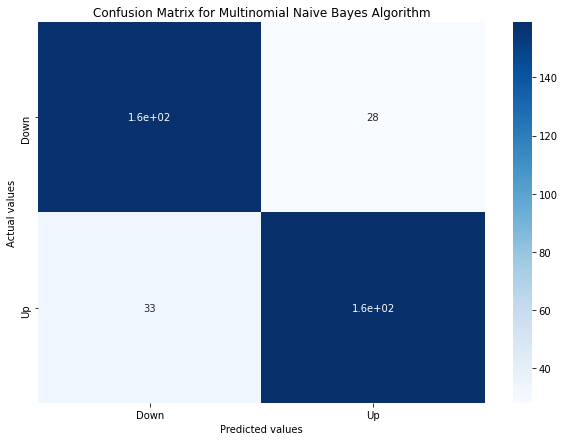

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [29]:
def stock_prediction(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)
  temp = cv.transform([final_news]).toarray()
  return lr_classifier.predict(temp)

In [30]:
sample_test = df_copy[df_copy['Date'] > '20141231']
sample_test.reset_index(inplace=True)
sample_test = sample_test['Top1']

In [31]:
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]
print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: An Australian athlete who has competed in six Paralympic Games has been robbed at gunpoint in the Brazilian city of Rio de Janeiro. Liesl Tesch said a man brandishing a gun pushed her off her bicycle and stole it on Sunday.
Prediction: The stock price will go up!


In [32]:
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]
print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Supreme Court of Canada strikes down ban on doctor-assisted suicide
Prediction: The stock price will remain the same or will go down.


In [33]:
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]
print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Netherlands will once again need to close prisons due to falling crime rate and lack of prisoners.
Prediction: The stock price will go up!


In [34]:
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]
print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Belgium Tells Facebook to Stop Storing Data From Non-Users - Facebook faces a fine of 250,000 euros ($269,000) a day if it doesnt comply
Prediction: The stock price will remain the same or will go down.
